Загрузите набор данных о мобильных телефонах: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

Изучите полученный набор данных.

Преобразуйте набор данных, подготовив его к применению классификации с помощью дерева решений:
- выполните минимальные необходимые манипуляции, а также
- отделите столбец с меткой price_range и
- разбейте данные на тренировочный и тестовый наборы.

Обучите классификатор DecisionTreeClassifier на тренировочном наборе.

Используйте обученную модель на тестовых данных, оцените полученные результаты с помощью нескольких метрик.

Визуализируйте и интерпретируйте обученную модель.

Нормализуйте данные и обучите дерево на них. Как нормализация повлияла на результаты предсказания?

Подберите значения гиперпараметров с помощью RandomizedSearchCV.

Сделайте выводы об использовании (плюсах и минусах) деревьев решений для классификации в целом и применительно к рассмотренному набору данных.

Примените ансамблевые методы на основе деревьев решений:
- случайный лес RandomForestClassifier,
- AdaBoostClassifier,
- GradientBoostingClassifier (HistGradientBoostingClassifier),
- свой вариант построения, обучения и оценки работы ансамбля.

# Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Датасет

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

100%|██████████| 70.6k/70.6k [00:00<00:00, 15.4MB/s]

Extracting files...


In [ ]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1/train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
all_data = data.copy()

<Axes: >

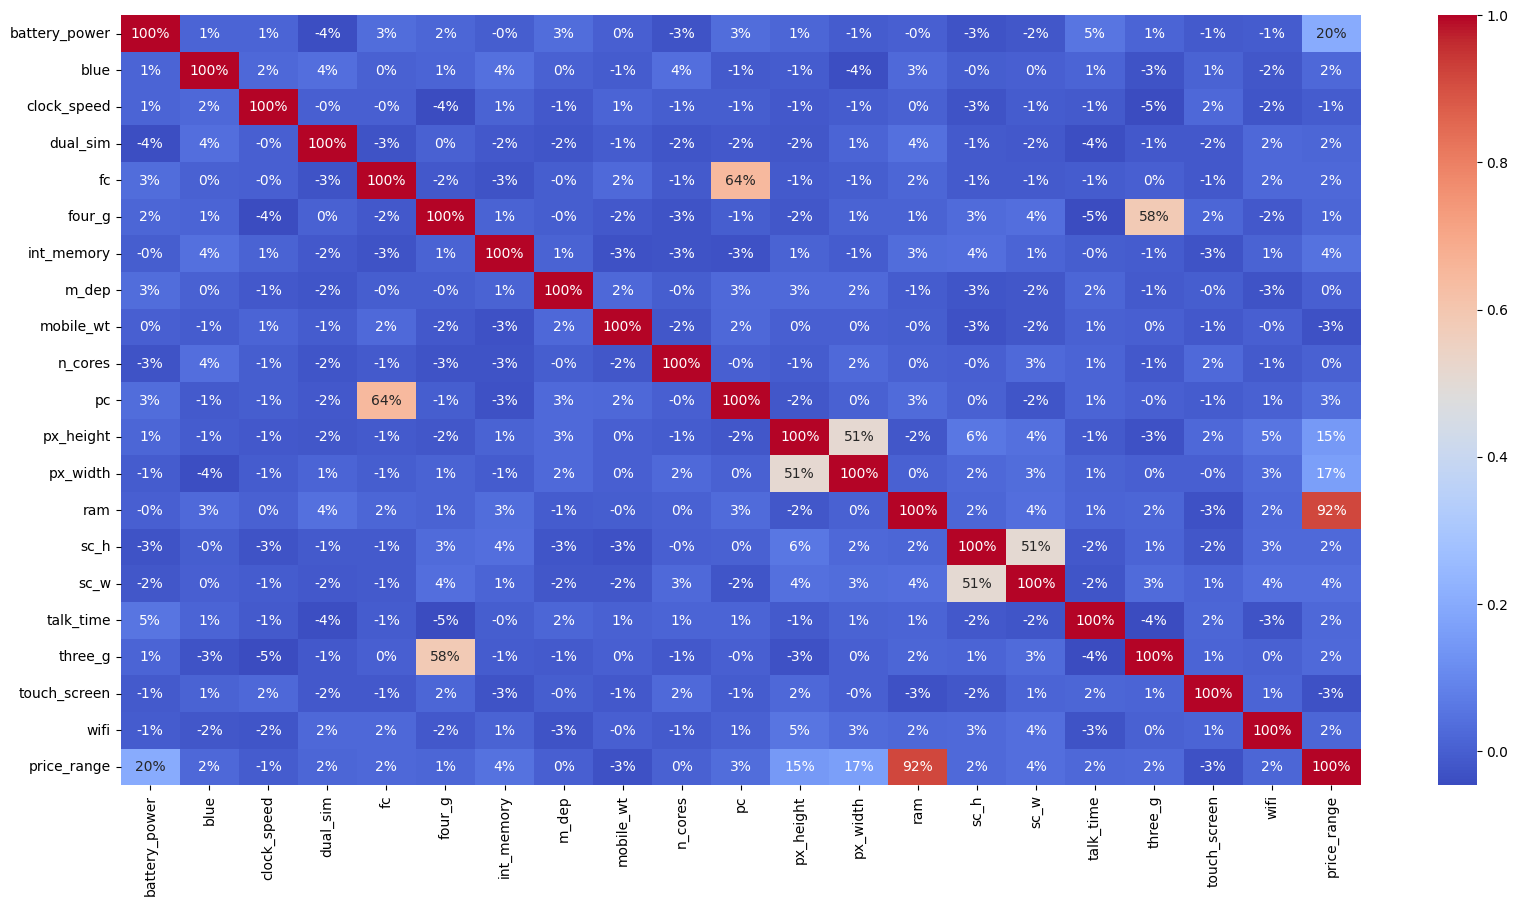

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.0%')

Заметим, что ram и price_range очень сильно ( 92% ) коррелируют, это логично, так как цена зависит от количества оперативной памяти в реальности.

Также хорошо коррелируют pc ( основная камера ) и fc ( фронтальная камера ), это логично, так как чем лучше основная камера, тем лучше стараются ставить фронтальную камеру.

Есть корреляция у three_g и four_g - логично, так как если телефон поддерживает 4g, то он поддерживает и 3g ( обратное не обязательно, пожтому корреляция не слишком сильная, что может означать, что в датасете большинство телефонов 3g )



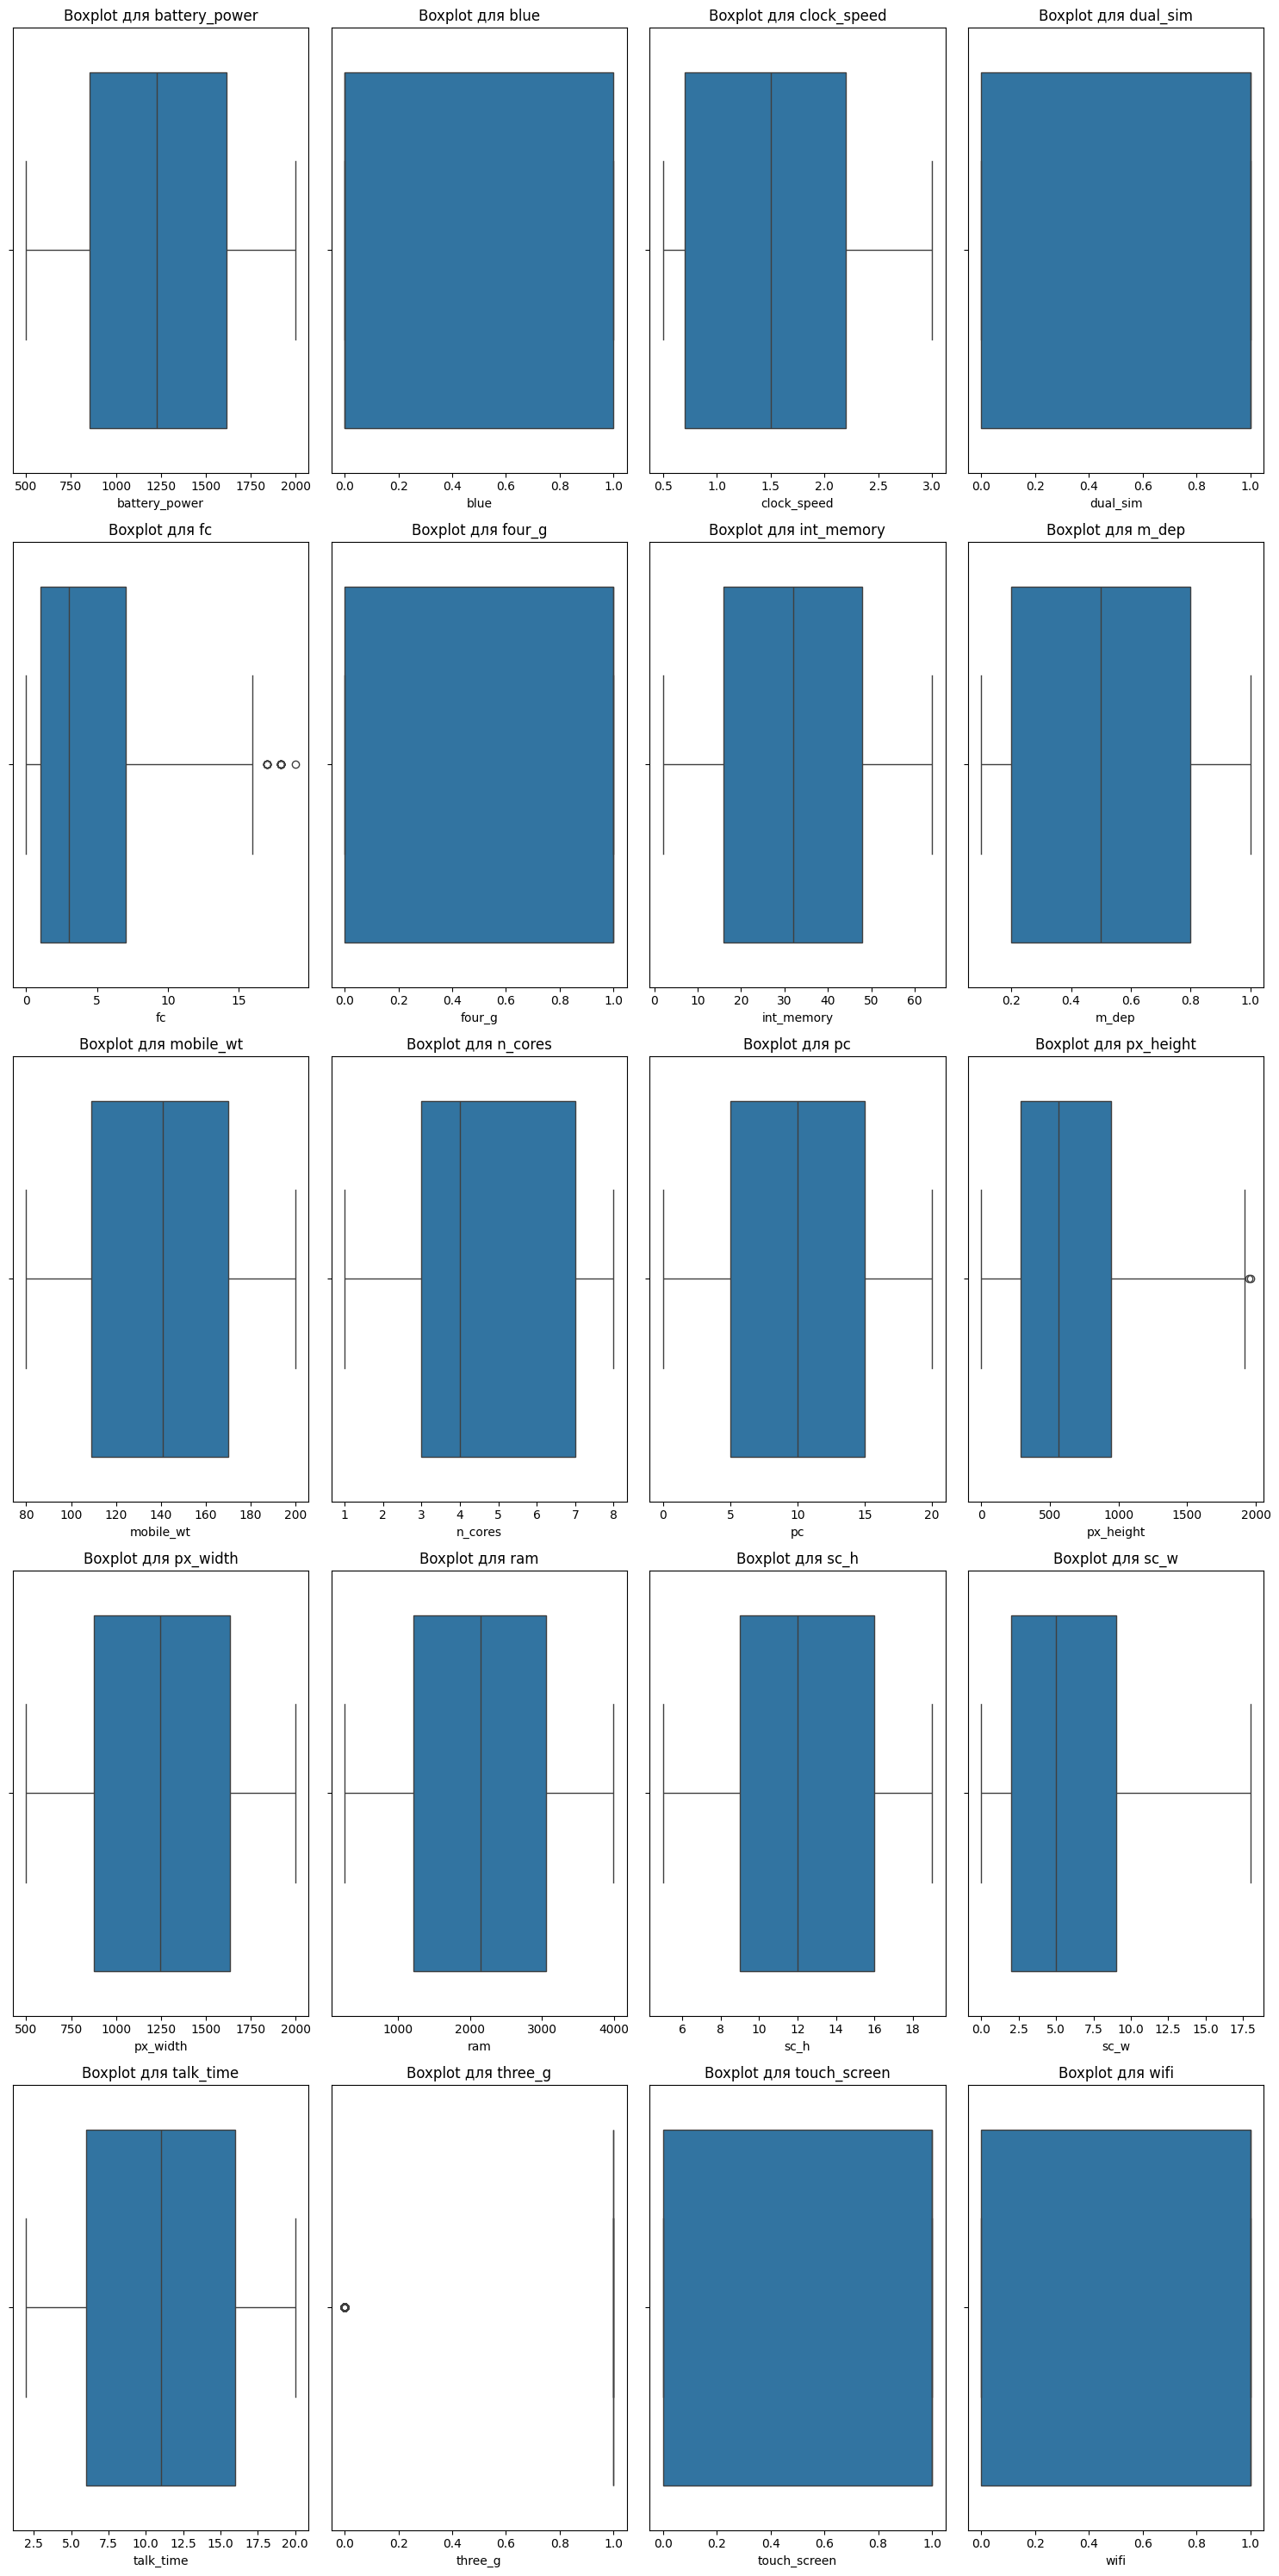

In [ ]:
data_1 = data.drop(columns='price_range')
plt.figure(figsize=(15, 30))
for i, column in enumerate(data_1.columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot для {column}')
plt.tight_layout()
plt.show()

Есть "выбросы" в three_g - скорее всего это телефон старой модели, который не поддерживает 3g

Есть еще какие-то телефоны с очень большими экранами - не выбросы

## Есть странные значения с нулями у признаков, в которых нулей быть не должно. Посмотрим на них

In [ ]:
num_cols = [col for col in data.columns if data[col].nunique() > 10]
cat_cols = [col for col in data.columns if data[col].nunique() <= 10]

In [ ]:
data_num = data.drop(columns=cat_cols)

In [ ]:
mask = data_num.eq(0).any(axis=1)
data_num[mask]

,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
1,1021,0.5,0,53,136,6,905,1988,2631,17,3,7
3,615,2.5,0,10,131,9,1216,1786,2769,16,8,11
7,1954,0.5,0,24,187,0,512,1149,700,16,3,5
8,1445,0.5,0,53,174,14,386,836,1099,17,1,20
10,769,2.9,0,9,182,1,248,874,3946,5,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,2.6,8,6,199,20,698,1018,1300,10,0,2
1984,797,2.2,0,37,144,2,206,1167,2216,9,5,6
1993,1467,0.5,0,18,122,0,888,1099,3962,15,11,5
1995,794,0.5,0,2,106,14,1222,1890,668,13,4,19


In [ ]:
for col in data_num.columns:
    print(f"Количество нулей в {col}: {data_num[col].eq(0).sum()}")

Количество нулей в battery_power: 0
Количество нулей в clock_speed: 0
Количество нулей в fc: 474
Количество нулей в int_memory: 0
Количество нулей в mobile_wt: 0
Количество нулей в pc: 101
Количество нулей в px_height: 2
Количество нулей в px_width: 0
Количество нулей в ram: 0
Количество нулей в sc_h: 0
Количество нулей в sc_w: 180
Количество нулей в talk_time: 0


В fc и pc нулевые значения вероятнее всего просто округление до мегапикселей.

Нули в px_height выглядят странно, так как это высота экрана в пикселях. Также странно выглядят нули в sc_w - ширина экрана в см.

# Деревья

## Разделение на тренировочную и тестовую подвыборки

In [ ]:
def test_train(data):
    X = data.drop(columns='price_range')
    y = data.price_range

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
def scoring(X_train, X_test, y_train, y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted')}")

    return

## Обучение на исходных тестовых данных

In [ ]:
X_train, X_test, y_train, y_test = test_train(data)

In [ ]:
pipe_none = Pipeline([
    ('tree_model', DecisionTreeClassifier(random_state=0))
])

In [ ]:
pipe_none.fit(X_train, y_train)

Pipeline(steps=[('tree_model', DecisionTreeClassifier(random_state=0))])

In [ ]:
y_pred = pipe_none.predict(X_test)

In [ ]:
scoring(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.8083333333333333
Precision: 0.8105479943602053
Recall: 0.8083333333333333
F1-score: 0.8091616624876417


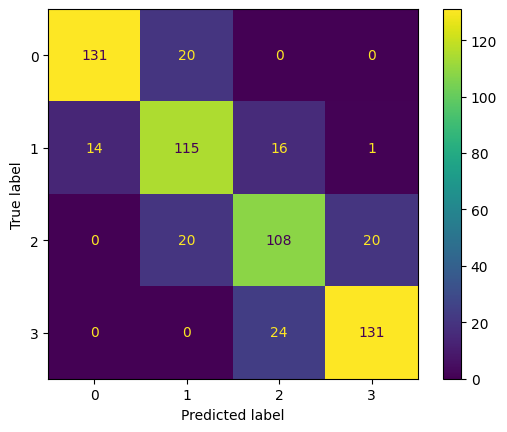

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=pipe_none.named_steps['tree_model'].classes_)

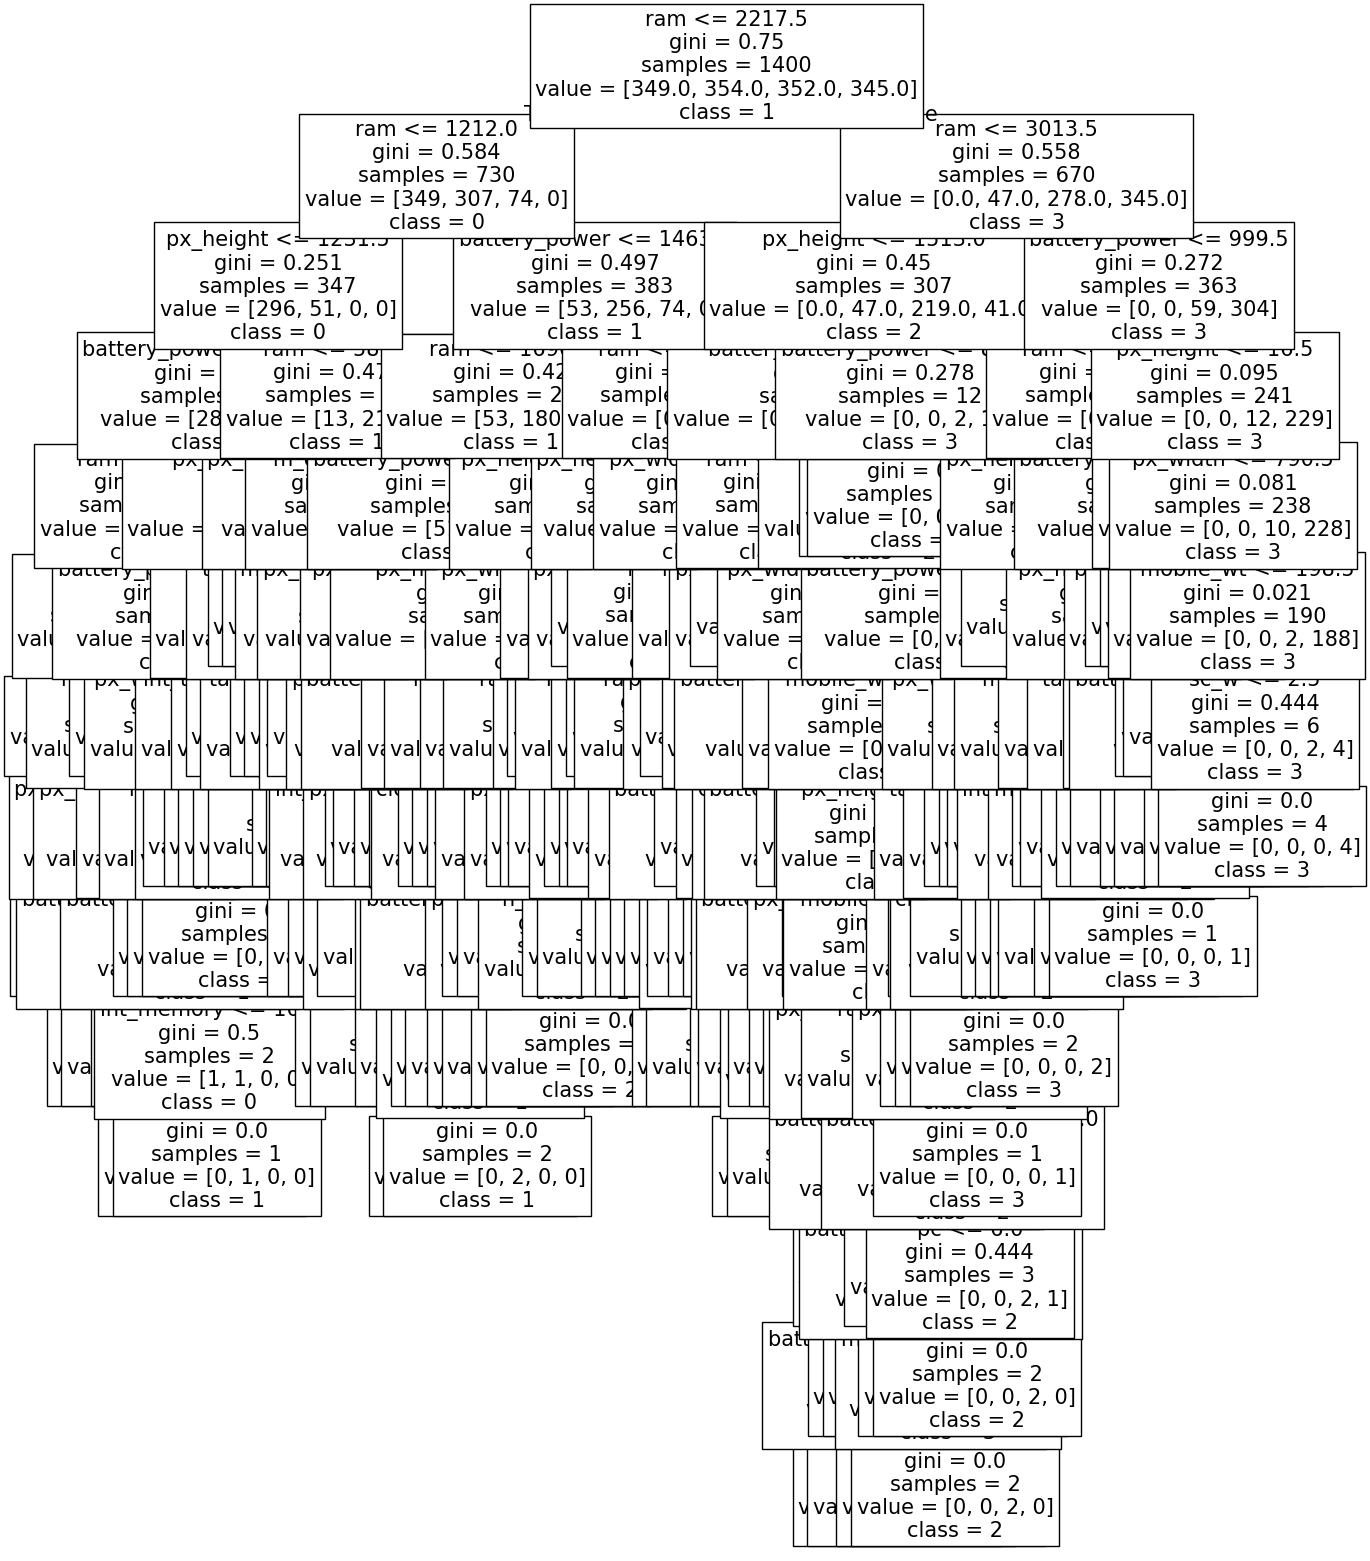

In [ ]:
plt.figure(figsize=(15,20))
tmp = pipe_none.named_steps['tree_model']
plot_tree(tmp, feature_names=tmp.feature_names_in_, class_names=tmp.classes_.astype(str), fontsize=15);

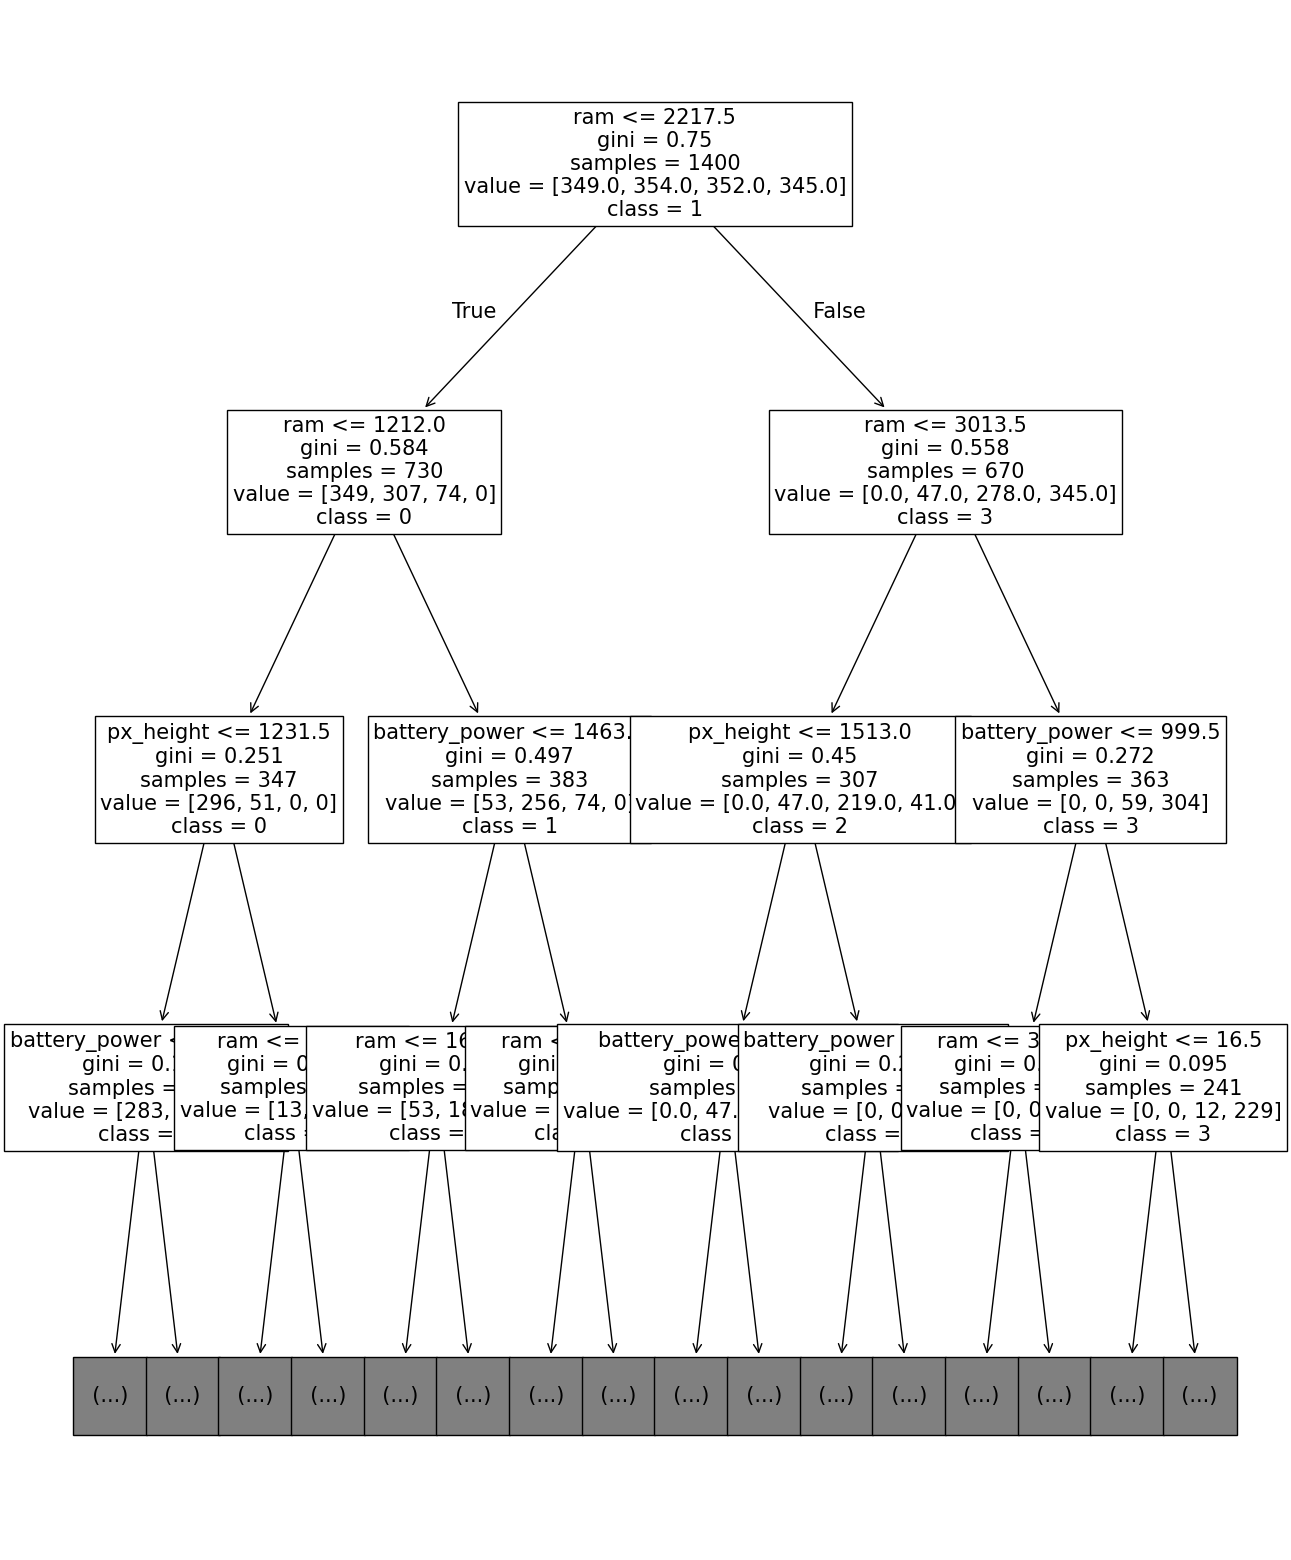

In [ ]:
plt.figure(figsize=(15,20))
tmp = pipe_none.named_steps['tree_model']
plot_tree(tmp, feature_names=tmp.feature_names_in_, class_names=tmp.classes_.astype(str), fontsize=15, max_depth=3);

## Нормализация данных

In [ ]:
pipe_standart = Pipeline([
    ('scaler', StandardScaler()),
    ('tree_model', DecisionTreeClassifier(random_state=0))
])

pipe_minmax = Pipeline([
    ('scaler', MinMaxScaler()),
    ('tree_model', DecisionTreeClassifier(random_state=0))
])

In [ ]:
for pipe in [pipe_none, pipe_standart, pipe_minmax]:
    print(pipe)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    scoring(X_train, X_test, y_train, y_test, y_pred)
    print()

Pipeline(steps=[('tree_model', DecisionTreeClassifier(random_state=0))])
Accuracy: 0.8083333333333333
Precision: 0.8105479943602053
Recall: 0.8083333333333333
F1-score: 0.8091616624876417

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree_model', DecisionTreeClassifier(random_state=0))])
Accuracy: 0.8083333333333333
Precision: 0.8105619939385313
Recall: 0.8083333333333333
F1-score: 0.8092251595888895

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('tree_model', DecisionTreeClassifier(random_state=0))])
Accuracy: 0.81
Precision: 0.8121677439546248
Recall: 0.81
F1-score: 0.8108364427748249



Нормализация никак не влияет на деревья

## Гиперпараметры

In [ ]:
param_distributions = {
    'tree_model__criterion': ['gini', 'entropy', 'log_loss'],
    'tree_model__max_depth': [None] + list(range(3, 30, 3)),
    'tree_model__min_samples_split': range(2, 20, 2),
    'tree_model__min_samples_leaf': range(1, 20, 2),
    'tree_model__max_features': [None, 'sqrt', 'log2'],
    'tree_model__class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=pipe_none,
    param_distributions=param_distributions,
    n_iter=50,  # Количество случайных комбинаций
    cv=5,  # Количество фолдов кросс-валидации
    scoring='accuracy',  # Метрика оценки
    random_state=0,
    n_jobs=-1  # Использование всех процессоров
)

In [ ]:
random_search.fit(X_train, y_train)
random_search.best_params_

{'tree_model__min_samples_split': 12,
 'tree_model__min_samples_leaf': 7,
 'tree_model__max_features': None,
 'tree_model__max_depth': None,
 'tree_model__criterion': 'entropy',
 'tree_model__class_weight': None}

In [ ]:
y_pred = random_search.predict(X_test)

In [ ]:
scoring(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.8616666666666667
Precision: 0.8649540645718989
Recall: 0.8616666666666667
F1-score: 0.8619671460420981


# Плюсы и минусы

**Плюсы**:
1. Простота интерпретации.
2. Универсальность.
3. Эффективность с ограниченными данными.
4. Оценка важности признаков: Деревья решений помогают определить, какие признаки наиболее важны для классификации.

**Минусы**:
1. Склонность к переобучению.
2. Зависимость от качества данных.
3. Сложность построения.


# RandomForestClassifier

In [ ]:
pipeline = Pipeline([
    ('rf_model', RandomForestClassifier(random_state=0))
])

In [ ]:
param_distributions = {
    'rf_model__n_estimators': np.arange(50, 500, 50),  # Количество деревьев
    'rf_model__criterion': ['gini', 'entropy', 'log_loss'],  # Критерий разбиения
    'rf_model__max_depth': [None] + list(range(3, 30, 3)),  # Глубина деревьев
    'rf_model__min_samples_split': range(2, 20, 2),  # Минимальное число образцов для разбиения
    'rf_model__min_samples_leaf': range(1, 20, 2),  # Минимальное число образцов в листе
    'rf_model__max_features': ['sqrt', 'log2', None],  # Число признаков для каждого дерева
    'rf_model__bootstrap': [True, False],  # Использовать бутстрэп выборку?
    'rf_model__class_weight': [None, 'balanced', 'balanced_subsample']  # Веса классов
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=0,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)
random_search.best_params_

{'rf_model__n_estimators': np.int64(250),
 'rf_model__min_samples_split': 12,
 'rf_model__min_samples_leaf': 1,
 'rf_model__max_features': 'log2',
 'rf_model__max_depth': 27,
 'rf_model__criterion': 'log_loss',
 'rf_model__class_weight': 'balanced_subsample',
 'rf_model__bootstrap': False}

In [ ]:
y_pred = random_search.predict(X_test)

In [ ]:
scoring(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.885
Precision: 0.8847939157043018
Recall: 0.885
F1-score: 0.8839708348478988


# AdaBoostClassifier

In [ ]:
pipeline = Pipeline([
    ('adaboost_model', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(random_state=0),
        random_state=0
    ))
])

In [ ]:
param_distributions = {
    'adaboost_model__n_estimators': np.arange(50, 500, 50),  # Количество слабых моделей
    'adaboost_model__learning_rate': np.logspace(-3, 1, 10),  # Темп обучения
    'adaboost_model__algorithm': ['SAMME', 'SAMME.R'],  # Алгоритм обновления весов
    'adaboost_model__estimator__max_depth': np.arange(1, 10),  # Глубина базового дерева
    'adaboost_model__estimator__min_samples_split': np.arange(2, 20, 2),  # Минимальный размер разбиения
    'adaboost_model__estimator__min_samples_leaf': np.arange(1, 10, 2),  # Минимальный размер листа
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=0,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
155 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
155 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, *

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('adaboost_model',
                                              AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=0),
                                                                 random_state=0))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'adaboost_model__algorithm': ['SAMME',
                                                                      'SAMME.R'],
                                        'adaboost_model__estimator__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'adaboost_model__estimator__min_samples_...
                                        'adaboost_model__estimator__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'adaboost_model__learning_rate': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                                        'adaboost_model__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=0, scoring='accuracy')

In [ ]:
random_search.best_params_

{'adaboost_model__n_estimators': np.int64(400),
 'adaboost_model__learning_rate': np.float64(0.46415888336127775),
 'adaboost_model__estimator__min_samples_split': np.int64(8),
 'adaboost_model__estimator__min_samples_leaf': np.int64(9),
 'adaboost_model__estimator__max_depth': np.int64(8),
 'adaboost_model__algorithm': 'SAMME'}

In [ ]:
y_pred = random_search.predict(X_test)
scoring(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.9116666666666666
Precision: 0.9134088221540427
Recall: 0.9116666666666666
F1-score: 0.9115843282302559


# GradientBoostingClassifier

In [ ]:
pipeline = Pipeline([
    ('hgb_model', HistGradientBoostingClassifier(random_state=0))
])

In [ ]:
param_distributions = {
    'hgb_model__learning_rate': np.logspace(-3, 0, 10),  # Темп обучения
    'hgb_model__max_iter': np.arange(50, 500, 50),  # Количество итераций
    'hgb_model__max_depth': np.arange(3, 30, 3),  # Глубина деревьев
    'hgb_model__min_samples_leaf': np.arange(1, 20, 2),  # Минимальный размер листа
    'hgb_model__l2_regularization': np.logspace(-4, 1, 10),  # L2-регуляризация
    'hgb_model__max_bins': np.arange(32, 256, 32),  # Количество бинов для гистограммы
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=0,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)
random_search.best_params_

{'hgb_model__min_samples_leaf': np.int64(7),
 'hgb_model__max_iter': np.int64(50),
 'hgb_model__max_depth': np.int64(6),
 'hgb_model__max_bins': np.int64(128),
 'hgb_model__learning_rate': np.float64(0.46415888336127775),
 'hgb_model__l2_regularization': np.float64(0.0001)}

In [ ]:
y_pred = random_search.predict(X_test)
scoring(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.9033333333333333
Precision: 0.9044089235930274
Recall: 0.9033333333333333
F1-score: 0.9032706682206681


# HistGradientBoostingClassifier

In [ ]:
pipeline = Pipeline([
    ('gb_model', GradientBoostingClassifier(random_state=0))
])

In [ ]:
param_distributions = {
    'gb_model__learning_rate': np.logspace(-3, 0, 10),  # Темп обучения
    'gb_model__n_estimators': np.arange(50, 500, 50),  # Количество деревьев
    'gb_model__max_depth': np.arange(3, 30, 3),  # Глубина деревьев
    'gb_model__min_samples_split': np.arange(2, 20, 2),  # Минимальный размер разбиения
    'gb_model__min_samples_leaf': np.arange(1, 20, 2),  # Минимальный размер листа
    'gb_model__subsample': np.linspace(0.5, 1.0, 5),  # Доля выборки для каждого дерева
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=0,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)
random_search.best_params_

{'gb_model__subsample': np.float64(0.5),
 'gb_model__n_estimators': np.int64(400),
 'gb_model__min_samples_split': np.int64(2),
 'gb_model__min_samples_leaf': np.int64(11),
 'gb_model__max_depth': np.int64(3),
 'gb_model__learning_rate': np.float64(0.1)}

In [ ]:
y_pred = random_search.predict(X_test)
scoring(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.9066666666666666
Precision: 0.9072531257435522
Recall: 0.9066666666666666
F1-score: 0.9067459447706024


# BaggingClassifier


In [ ]:
pipeline = Pipeline([
    ('bagging_model', BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=0),
        random_state=0
    ))
])

In [ ]:
param_distributions = {
    'bagging_model__n_estimators': np.arange(10, 200, 10),  # Количество базовых моделей
    'bagging_model__max_samples': np.linspace(0.5, 1.0, 5),  # Доля выборки для обучения каждой модели
    'bagging_model__max_features': np.linspace(0.5, 1.0, 5),  # Доля признаков для каждой модели
    'bagging_model__bootstrap': [True, False],  # Использование бутстрэп-выборки
    'bagging_model__bootstrap_features': [True, False],  # Бутстрэп по признакам
    'bagging_model__estimator__max_depth': np.arange(3, 30, 3),  # Глубина базового дерева
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=0,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)
random_search.best_params_

{'bagging_model__n_estimators': np.int64(140),
 'bagging_model__max_samples': np.float64(0.75),
 'bagging_model__max_features': np.float64(0.875),
 'bagging_model__estimator__max_depth': np.int64(12),
 'bagging_model__bootstrap_features': False,
 'bagging_model__bootstrap': True}

In [ ]:
y_pred = search.predict(X_test)
scoring(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.8833333333333333
Precision: 0.8854875899882533
Recall: 0.8833333333333333
F1-score: 0.883485569740765


# VotingClassifier

In [ ]:
rf = RandomForestClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)

In [ ]:
pipeline = Pipeline([
    ('voting_model', VotingClassifier(
        estimators=[('rf', rf), ('gb', gb)],
        voting='soft'  # Используем вероятности классов
    ))
])

In [ ]:
param_distributions = {
    'voting_model__rf__n_estimators': np.arange(50, 500, 50),  # Количество деревьев в RF
    'voting_model__rf__max_depth': np.arange(3, 30, 3),  # Глубина RF
    'voting_model__gb__n_estimators': np.arange(50, 500, 50),  # Количество деревьев в GB
    'voting_model__gb__learning_rate': np.logspace(-3, 0, 10),  # Темп обучения GB
    'voting_model__voting': ['hard', 'soft'],  # Способ голосования
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=0,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)
random_search.best_params_

{'voting_model__voting': 'soft',
 'voting_model__rf__n_estimators': np.int64(50),
 'voting_model__rf__max_depth': np.int64(3),
 'voting_model__gb__n_estimators': np.int64(50),
 'voting_model__gb__learning_rate': np.float64(1.0)}

In [ ]:
y_pred = random_search.predict(X_test)
scoring(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.89
Precision: 0.8898322831727206
Recall: 0.89
F1-score: 0.8897419578801202


# Итоговые результаты:

Лучшие результаты показала AdaBoostClassifier:
- Accuracy: 0.9116666666666666
- Precision: 0.9134088221540427
- Recall: 0.9116666666666666
- F1-score: 0.9115843282302559